# Cost Function or loss Function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
x=df[['Height']].values
y_true=df[['Weight']].values
def line(x,w=0,b=0):
    return w*x+b

def mean_Square_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

[131.1417931672291, 82.62957208407575, 38.17227332081024, 32.96359686320369, 75.60472859445356, 123.87716195296917]


Text(0.5, 0, 'b')

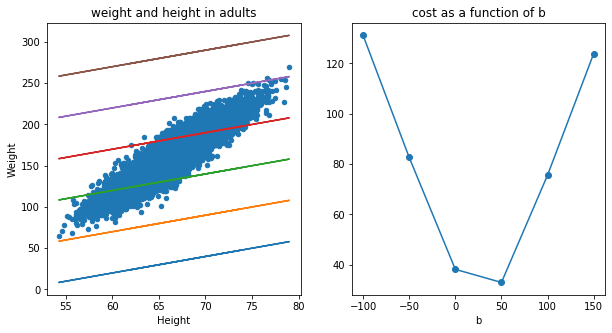

In [3]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='weight and height in adults',ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x,w=2,b=b)
    mse=mean_Square_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(x,y_pred)
print(mses)
    
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title("cost as a function of b")
plt.xlabel('b')

# Linear function using Keras 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [5]:
x.shape

(10000, 1)

In [6]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [9]:
model.fit(x,y_true,epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 102us/sample - loss: 906.7815
Epoch 2/40
10000/10000 [==============================] - 1s 53us/sample - loss: 546.4464
Epoch 3/40
10000/10000 [==============================] - 1s 51us/sample - loss: 521.43350s - loss:
Epoch 4/40
10000/10000 [==============================] - 1s 51us/sample - loss: 477.7315
Epoch 5/40
10000/10000 [==============================] - 0s 47us/sample - loss: 439.2927
Epoch 6/40
10000/10000 [==============================] - 0s 46us/sample - loss: 388.4508
Epoch 7/40
10000/10000 [==============================] - 1s 54us/sample - loss: 352.2737
Epoch 8/40
10000/10000 [==============================] - 1s 51us/sample - loss: 310.2423
Epoch 9/40
10000/10000 [==============================] - 1s 50us/sample - loss: 296.2534
Epoch 10/40
10000/10000 [==============================] - 0s 49us/sample - loss: 267.8015
Epoch 11/40
10000/10000 [==============================] - 1s 51u

In [10]:
y_pred=model.predict(x)

In [11]:
y_pred

array([[224.66302],
       [185.31635],
       [226.70673],
       ...,
       [147.14426],
       [187.27655],
       [132.20026]], dtype=float32)

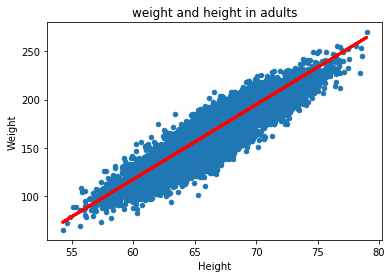

In [12]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',title='weight and height in adults')
plt.plot(x,y_pred,color='red',linewidth=3)

In [13]:
w,b=model.get_weights()
w

array([[7.76817]], dtype=float32)

In [14]:
b

array([-348.99316], dtype=float32)

In [15]:
model.predict([[200]])

array([[1204.6409]], dtype=float32)